In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.stats import shapiro
from scipy.stats import levene
from scipy import stats
from scipy.stats import f_oneway

In [2]:
data = pd.read_csv("hmelq.csv")
data = data.dropna()
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [3]:
data.describe(include='all')

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018,2018,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1428,774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.088206,19010.257681,76337.035183,106899.244797,NaN,NaN,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,NaN,NaN,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,NaN,NaN,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,NaN,NaN,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,NaN,NaN,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,NaN,NaN,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
data.dropna(inplace=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [6]:
# Number of bad customers
dist1 = pd.crosstab(index=data["bad"], columns="Count")
dist1

col_0,Count
bad,
0,1840
1,178


In [7]:
# Customers jobs
dist2 = pd.crosstab(index=data["job"],columns="Count")
dist2

col_0,Count
job,
Mgr,269
Office,348
Other,774
ProfEx,539
Sales,30
Self,58


In [8]:
dist_job = pd.crosstab(index=data["job"],columns=data["bad"],margins=True)
dist_job

bad,0,1,All
job,,,
Mgr,242,27,269
Office,326,22,348
Other,694,80,774
ProfEx,504,35,539
Sales,23,7,30
Self,51,7,58
All,1840,178,2018


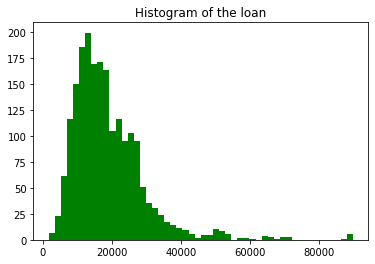

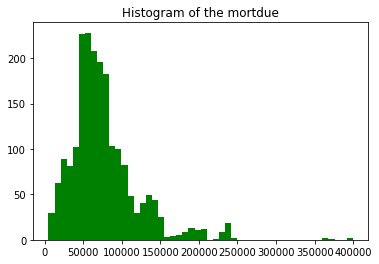

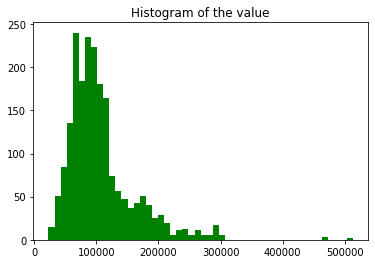

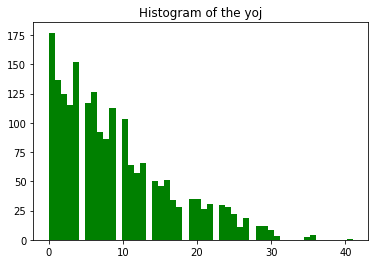

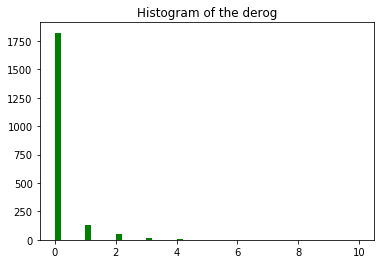

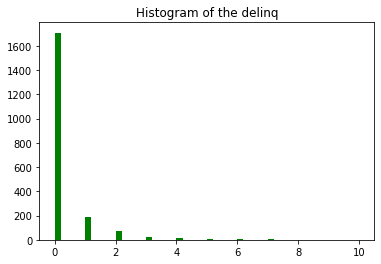

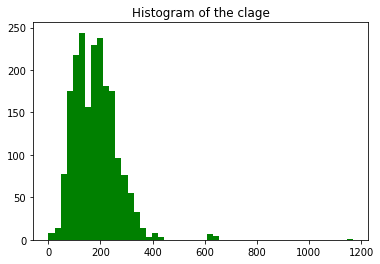

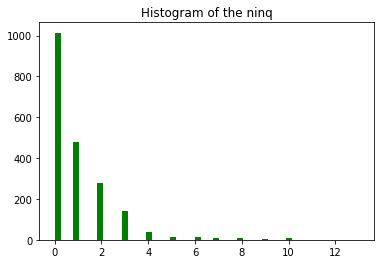

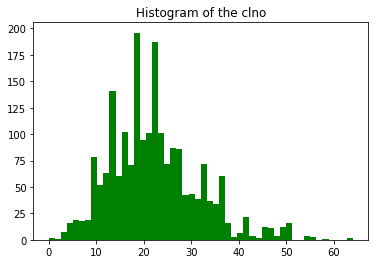

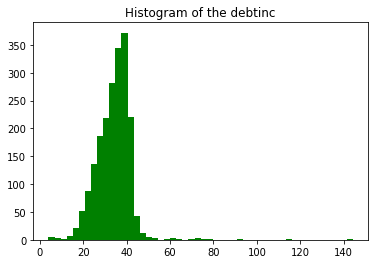

In [9]:
for i in data.columns:
    if(i!='job' and i!='reason' and i!='bad'):
        plt.figure()
        plt.hist(data[i],color="green",bins=50)
        plt.title("Histogram of the " + i)

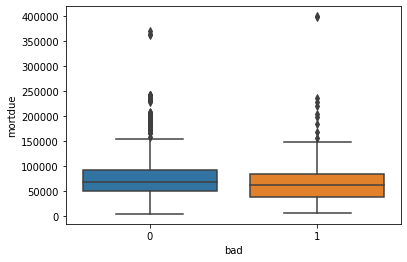

In [10]:
sns.boxplot(x = "bad", y = "mortdue", data = data)
plt.show()

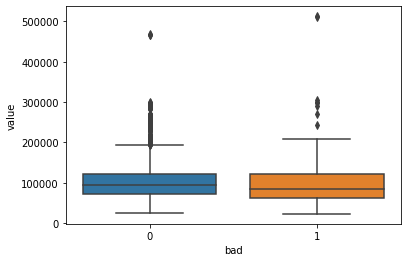

In [11]:
sns.boxplot(x = "bad", y = "value", data = data)
plt.show()

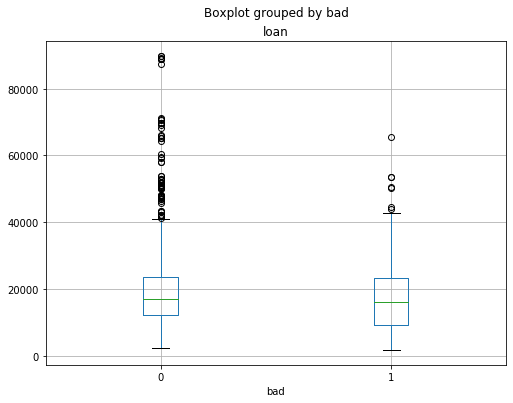

In [12]:
data.boxplot(column="loan", by = "bad", figsize=(8,6))

In [13]:
#shapiro test for bad's values 0 and 1
graph = pd.unique(data.bad.values)
graph
alpha = 0.05
for i in data.columns:
    if(i!='job' and i!='reason' and i!='bad'):
        for j in graph:
            stat,p=shapiro(data[i][data['bad']==j])
            print(i)
            print(j,"`s statistic value: %.3f, p value =" %stat , p)
            if p>alpha:
                print("Sample comes from Gaussian distribution")
            else:
                print("Sample comes from Gaussian distribution")

loan
0 `s statistic value: 0.825, p value = 7.618018971455436e-41
Sample comes from Gaussian distribution
loan
1 `s statistic value: 0.904, p value = 2.437214208228511e-09
Sample comes from Gaussian distribution
mortdue
0 `s statistic value: 0.876, p value = 6.140487180178297e-36
Sample comes from Gaussian distribution
mortdue
1 `s statistic value: 0.753, p value = 5.364428532155343e-16
Sample comes from Gaussian distribution
value
0 `s statistic value: 0.857, p value = 5.560680210281526e-38
Sample comes from Gaussian distribution
value
1 `s statistic value: 0.735, p value = 1.3988843091622356e-16
Sample comes from Gaussian distribution
yoj
0 `s statistic value: 0.914, p value = 3.7622141034931923e-31
Sample comes from Gaussian distribution
yoj
1 `s statistic value: 0.877, p value = 6.26317955831901e-11
Sample comes from Gaussian distribution
derog
0 `s statistic value: 0.299, p value = 0.0
Sample comes from Gaussian distribution
derog
1 `s statistic value: 0.477, p value = 1.058434997

In [14]:
for i in data.columns:
    if (i!='reason' and i!='job' and i!='bad'):
            stat,p = levene(data[i][data['bad'] == 0],
                   data[i][data['bad'] == 1]) 
            print("\n" "For",i,"statistic value: %.3f and p value =" %stat , p)
            alpha=0.05
            if p >alpha:
                print('Sample has constant variance')
                const=True
            else:
                print('Sample doesn`t has constant variance')
                const=False
            s,p =f_oneway(data[i][data['bad'] == 0],
                   data[i][data['bad'] == 1])
            print("F_oneway statisctic`s value: %.3f and p value =" %s , p)
            if p < 0.05:
                print("Isn't dummy variable (H0 = reject)")
            else:
                print("Is dummy variable (H0 = fail to reject)")


For loan statistic value: 2.395 and p value = 0.12189825252399986
Sample has constant variance
F_oneway statisctic`s value: 1.383 and p value = 0.2397120328521835
Is dummy variable (H0 = fail to reject)

For mortdue statistic value: 2.307 and p value = 0.12891801775903636
Sample has constant variance
F_oneway statisctic`s value: 1.271 and p value = 0.2596776838573122
Is dummy variable (H0 = fail to reject)

For value statistic value: 3.991 and p value = 0.0458714974437462
Sample doesn`t has constant variance
F_oneway statisctic`s value: 1.979 and p value = 0.15962080002940782
Is dummy variable (H0 = fail to reject)

For yoj statistic value: 4.210 and p value = 0.040312559874429624
Sample doesn`t has constant variance
F_oneway statisctic`s value: 5.244 and p value = 0.022121892389330128
Isn't dummy variable (H0 = reject)

For derog statistic value: 118.586 and p value = 7.1109894880631e-27
Sample doesn`t has constant variance
F_oneway statisctic`s value: 118.586 and p value = 7.1109894